# Requirements

In [27]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer,KNNImputer
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [28]:
!pip install missingno

In [29]:
!pip install scikit-learn

In [30]:
!pip install seaborn

In [31]:
!pip install numpy
!pip install matplotlib

In [32]:
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt

In [33]:
# Add as many imports as you need.

# Laboratory Exercise - Run Mode (8 points)

## Introduction
Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 70% unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies, several computer-aided diagnosis (CAD) systems have been proposed in the last years.These system help physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to perform a short term follow-up examination instead. This data set can be used to predict the severity (benign or malignant) of a mammographic mass lesion from BI-RADS attributes and the patient's age. It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes together with the ground truth (the severity field) for 516 benign and 445 malignant masses that have been identified on full field digital mammograms collected at the Institute of Radiology of the University Erlangen-Nuremberg between 2003 and 2006. Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign) to 5 (highly suggestive of malignancy) assigned in a double-review process by physicians. Assuming that all cases with BI-RADS assessments greater or equal a given value (varying from 1 to 5), are malignant and the other cases benign, sensitivities and associated specificities can be calculated. These can be an indication of how well a CAD system performs compared to the radiologists. For more details visit https://archive.ics.uci.edu/dataset/161/mammographic+mass.

## The Mammographic Mass Dataset

## Downloading the Mammographic Mass Dataset

In [34]:
!pip install --upgrade --no-cache-dir gdown

In [35]:
!gdown 1CyiAL5d2jJHvpzt3XaY3dTto9c2d_h5R 

Downloading...
From: https://drive.google.com/uc?id=1CyiAL5d2jJHvpzt3XaY3dTto9c2d_h5R
To: C:\Users\Ljupce\Documents\Python Codes\DS_lab2\mammographic-mass.csv

  0%|          | 0.00/13.3k [00:00<?, ?B/s]
100%|##########| 13.3k/13.3k [00:00<00:00, 26.1MB/s]


## Exploring the Mammographic Mass Dataset
The Mammographic Mass dataset contains six attributes, among which there is a target attribute and a non-predictive attribute. The target attribute, denoted as 'Severity', is binomial, distinguishing between benign (0) and malignant (1) cases. The non-predictive attribute, 'BI-RADS assessment', is an ordinal scale ranging from 1 to 5. The remaining four attributes are predictive, including 'Age', represented in years as an integer, 'Shape' categorizing mass shape as round (1), oval (2), lobular (3), or irregular (4). 'Margin' classifies mass margins into circumscribed (1), microlobulated (2), obscured (3), ill-defined (4), or spiculated (5). 'Density' indicates mass density as high (1), iso (2), low (3), or fat-containing (4).

Load the dataset into a `pandas` data frame.

In [36]:
data=pd.read_csv("./mammographic-mass.csv")

In [37]:
# Write your code here. Add as many boxes as you need.

In [38]:
data

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
0,5.0,67.0,3.0,5.0,3.0,1
1,4.0,43.0,1.0,1.0,NaN,1
2,5.0,58.0,4.0,5.0,3.0,1
3,4.0,28.0,1.0,1.0,3.0,0
4,5.0,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...,...
956,4.0,47.0,2.0,1.0,3.0,0
957,4.0,56.0,4.0,5.0,3.0,1
958,4.0,64.0,4.0,5.0,3.0,0
959,5.0,66.0,4.0,5.0,3.0,1


Drop the column `BI-RADS assessment` as it shouldn't be used for prediction.

In [39]:
data=data.drop('BI-RADS assessment',axis=1)

In [40]:
data.columns

Index(['Age', 'Shape', 'Margin', 'Density', 'Severity'], dtype='object')

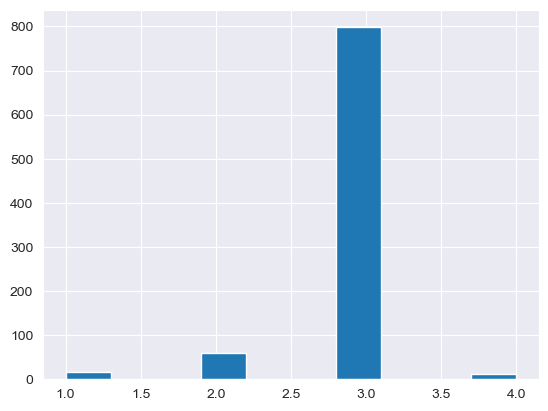

In [41]:
plt.hist(data.Density)
plt.show()

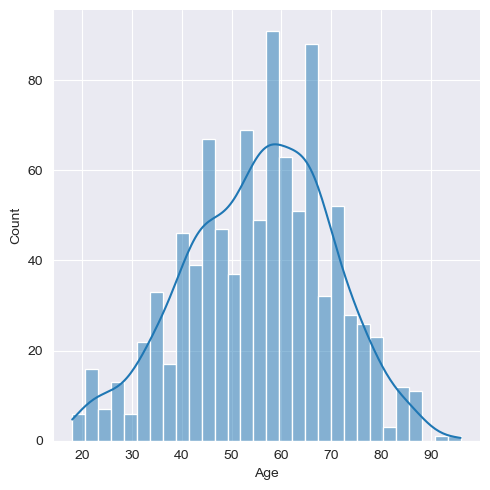

In [42]:
sns.displot(data.Age,bins=30,kde=True)
plt.show()

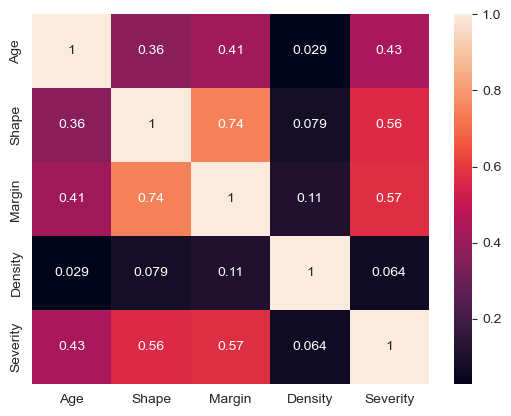

In [43]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [44]:
# Write your code here. Add as many boxes as you need.

Explore the dataset using visualizations of your choice.

In [45]:
# Write your code here. Add as many boxes as you need.

Check if the dataset is balanced.

In [46]:
# Write your code here. Add as many boxes as you need.

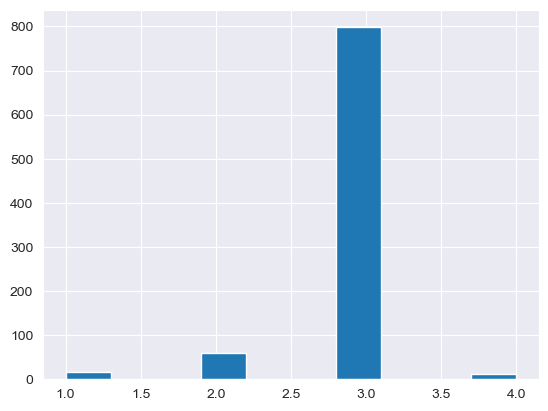

In [47]:
plt.hist(data.Density,bins=10)
plt.show()
#This is a column with numbers but they are repeated. Best for this is to impute the mode

## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [48]:
# Write your code here. Add as many boxes as you need.

In [49]:
miss_num_data=data.isnull().sum()


In [50]:
miss_perc = miss_num_data / len(data) * 100

## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

In [51]:
# Write your code here. Add as many boxes as you need.

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

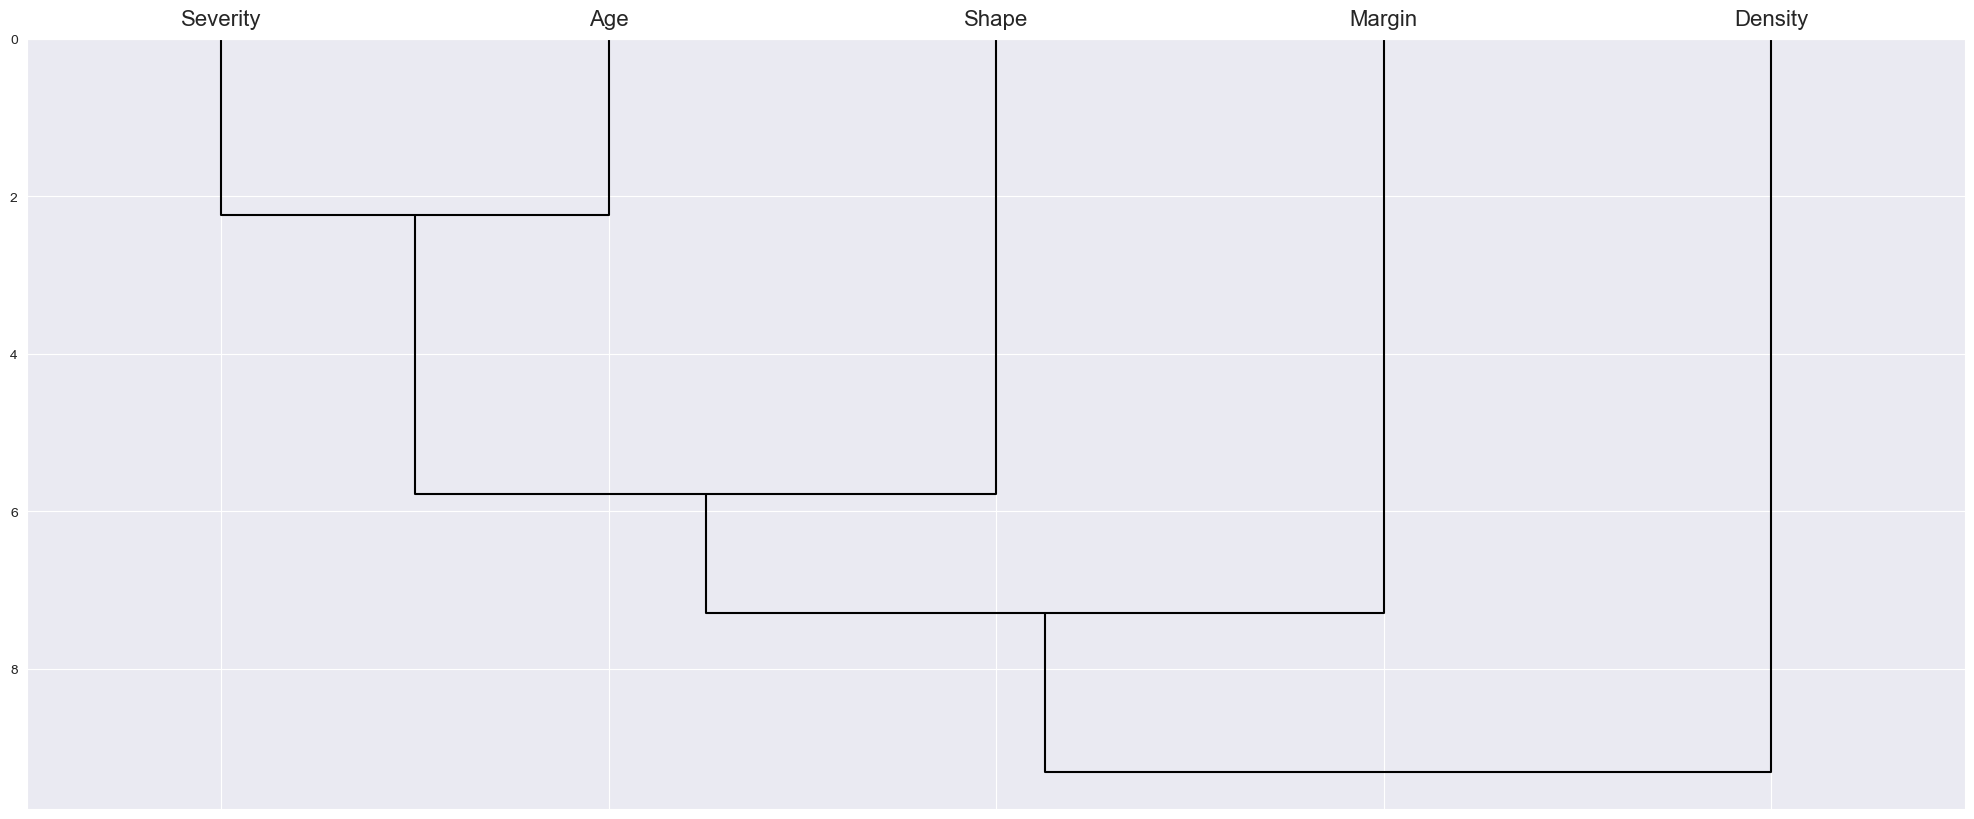

In [53]:
msno.dendrogram(data)
plt.show()

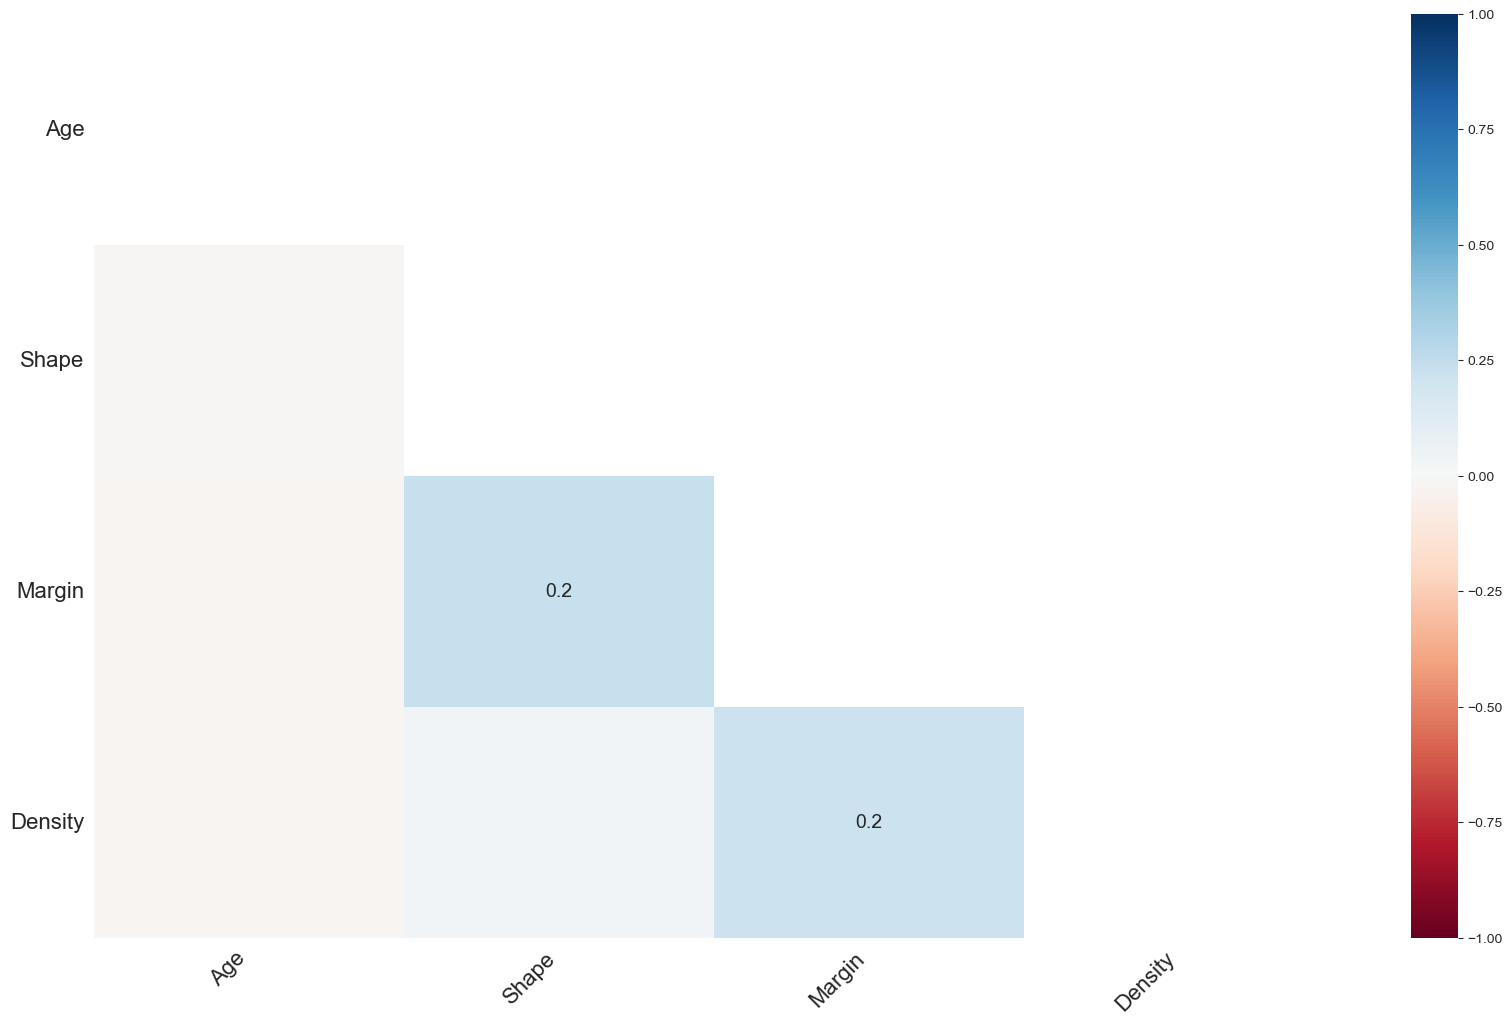

In [54]:
msno.heatmap(data)
plt.show()

ValueError: keyword grid_b is not recognized; valid keywords are ['size', 'width', 'color', 'tickdir', 'pad', 'labelsize', 'labelcolor', 'labelfontfamily', 'zorder', 'gridOn', 'tick1On', 'tick2On', 'label1On', 'label2On', 'length', 'direction', 'left', 'bottom', 'right', 'top', 'labelleft', 'labelbottom', 'labelright', 'labeltop', 'labelrotation', 'grid_agg_filter', 'grid_alpha', 'grid_animated', 'grid_antialiased', 'grid_clip_box', 'grid_clip_on', 'grid_clip_path', 'grid_color', 'grid_dash_capstyle', 'grid_dash_joinstyle', 'grid_dashes', 'grid_data', 'grid_drawstyle', 'grid_figure', 'grid_fillstyle', 'grid_gapcolor', 'grid_gid', 'grid_in_layout', 'grid_label', 'grid_linestyle', 'grid_linewidth', 'grid_marker', 'grid_markeredgecolor', 'grid_markeredgewidth', 'grid_markerfacecolor', 'grid_markerfacecoloralt', 'grid_markersize', 'grid_markevery', 'grid_mouseover', 'grid_path_effects', 'grid_picker', 'grid_pickradius', 'grid_rasterized', 'grid_sketch_params', 'grid_snap', 'grid_solid_capstyle', 'grid_solid_joinstyle', 'grid_transform', 'grid_url', 'grid_visible', 'grid_xdata', 'grid_ydata', 'grid_zorder', 'grid_aa', 'grid_c', 'grid_ds', 'grid_ls', 'grid_lw', 'grid_mec', 'grid_mew', 'grid_mfc', 'grid_mfcalt', 'grid_ms']

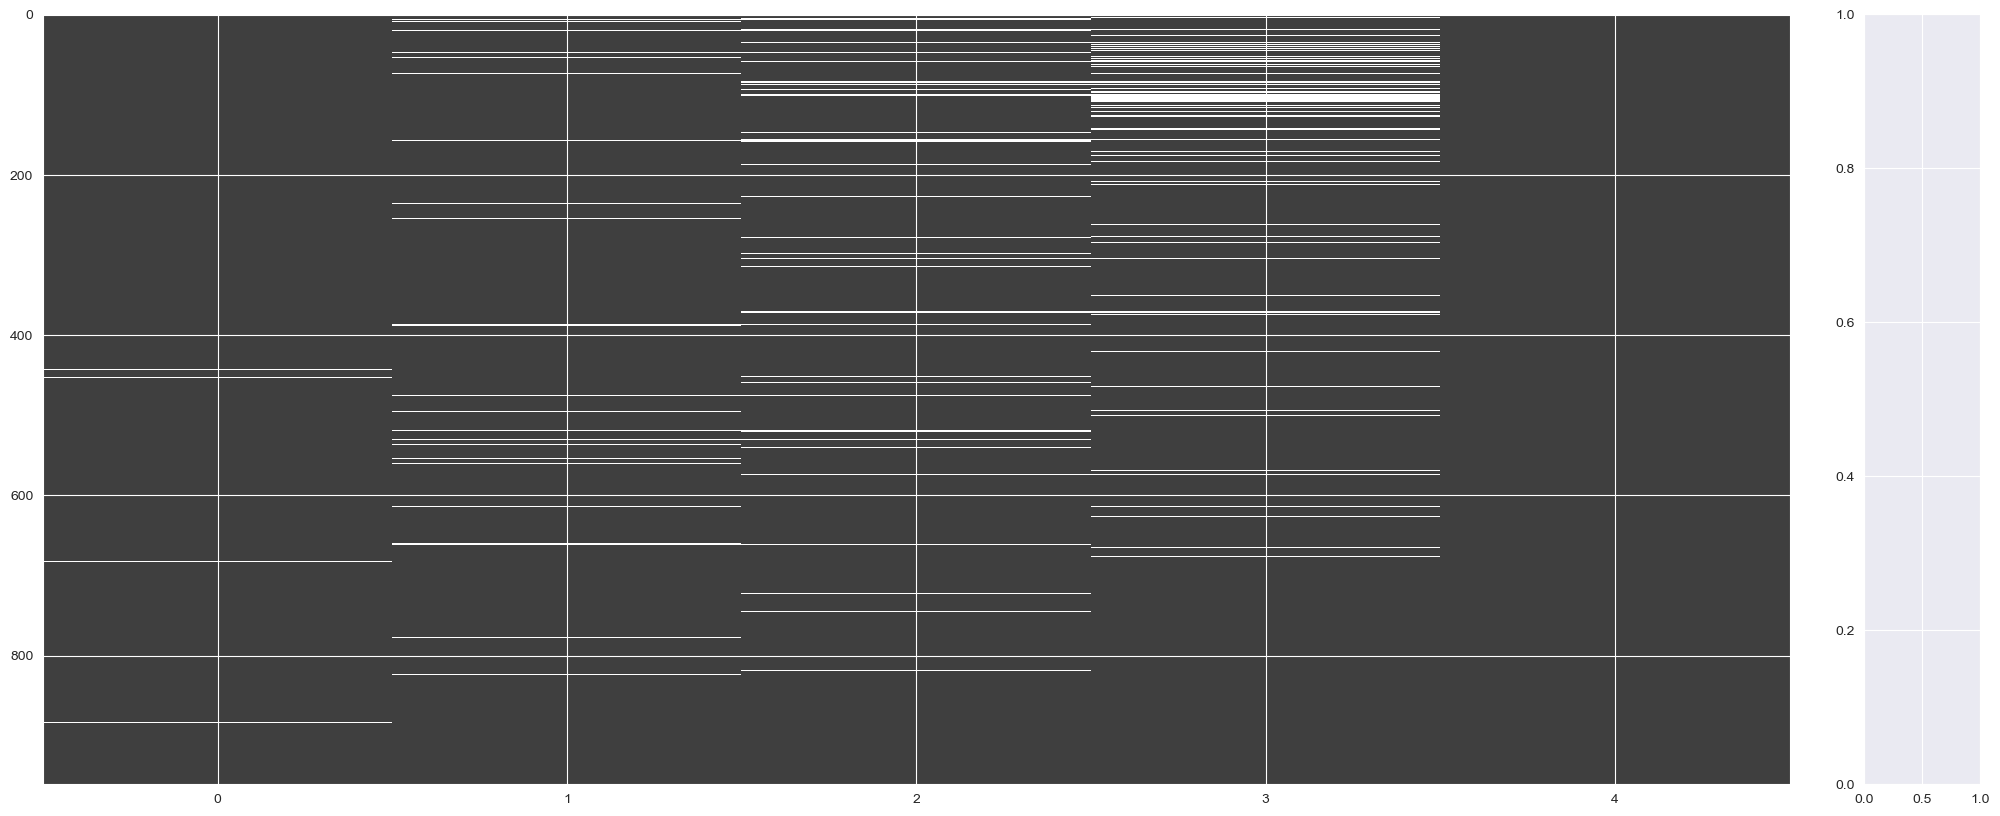

In [55]:
msno.matrix(data)
plt.show()

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [56]:
# Write your code here. Add as many boxes as you need.

In [57]:
miss_perc

Age         0.520291
Shape       3.225806
Margin      4.994797
Density     7.908429
Severity    0.000000
dtype: float64

In [58]:
#Because the Age column has a normal distribuiton and as far as i can see theres no outliers then we can insert the mean for the missing values
data["Age"]=data["Age"].fillna(data['Age'].mean())

In [59]:
data.isnull().sum()

Age          0
Shape       31
Margin      48
Density     76
Severity     0
dtype: int64

In [60]:
#Because we can see that Shape and Margin have high correlation we can impute them with KNN or MICE
mice=IterativeImputer()
imputed_val = mice.fit_transform(data[["Shape","Margin"]])
data[["Shape","Margin"]]=imputed_val

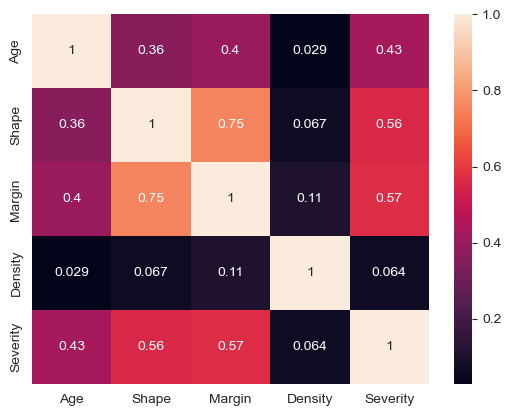

In [61]:
sns.heatmap(data.corr(),annot=True)
plt.show()

In [62]:
data.isnull().sum() / len(data) * 100

Age         0.000000
Shape       0.000000
Margin      0.000000
Density     7.908429
Severity    0.000000
dtype: float64

In [63]:
data.Density=data.Density.fillna(data.Density.mode()[0])


In [64]:
data.isnull().sum() / len(data) * 100

Age         0.0
Shape       0.0
Margin      0.0
Density     0.0
Severity    0.0
dtype: float64

## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [97]:
X=data.drop("Severity",axis=1)
Y=data["Severity"]

x_train,x_test,y_train,y_test = train_test_split(X,Y,test_size=0.2)

In [66]:
# Write your code here. Add as many boxes as you need.

## Feature Scaling
Standardize the features using `StandardScaler`.

In [67]:
# Write your code here. Add as many boxes as you need.

In [98]:
scaler=StandardScaler()
x_train=scaler.fit_transform(x_train)
x_test=scaler.transform(x_test)

## K-Nearset Neighbors Classification

Create an instance of the KNN Classification model and train it using the `fit` function.

In [99]:
# Write your code here. Add as many boxes as you need.

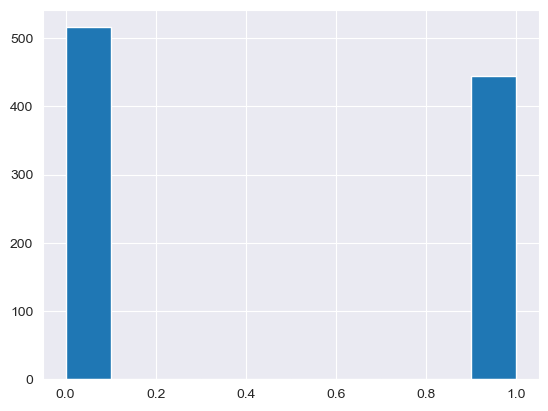

In [100]:
from sklearn.neighbors import KNeighborsClassifier
plt.hist(data.Severity)
plt.show()

In [101]:
#Because it is Categorical data we use A classifier,NOT a regressor

In [102]:
model=KNeighborsClassifier(n_neighbors=6)

Use the trained model to make predictions for the test set.

In [103]:
# Write your code here. Add as many boxes as you need.

In [104]:
model.fit(x_train,y_train)

y_pred=model.predict(x_test)

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [105]:
# Write your code here. Add as many boxes as you need.

In [106]:
from sklearn.metrics import r2_score,f1_score,mean_squared_error

In [107]:
r2_score(y_test,y_pred)

0.08511096746390856

In [108]:
f1_score(y_test,y_pred)

0.75

In [109]:
mean_squared_error(y_test,y_pred)

0.22797927461139897

# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune the number of neighbors (`n_neighbors`) using a validation set. This involves experimenting with various values for `n_neighbors` and evaluating the model's performance on a validation set. Subsequently, you're required to generate a line plot illustrating how the F1 score of the model predictions changes with different `n_neighbors` values. Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

## Dataset Splitting
To achieve the required split of the dataset into three sets (train set, validation set, and test set) in a ratio of 70:10:20, you can follow these steps:

- Start by splitting the dataset into a ratio of 80:20 to create the initial train and test sets.
- Subsequently, divide the initial train set further into a ratio of 87.5:12.5 to generate the final train and validation sets.

This process can be accomplished using appropriate functions from libraries such as `scikit-learn` or manually.

In [110]:
# Write your code here. Add as many boxes as you need.

In [111]:
# from sklearn.model_selection import GridSearchCV

# params={
#     'n_neighbors': [i for i in range(3,13)]
# }
# cv_modelce=KNeighborsClassifier()
# #cv_modelce.fit(x_train,y_train)
# cv=GridSearchCV(estimator=cv_modelce,param_grid=params,scoring='f1',cv=10)
# cv.fit(x_train,y_train)

# najdobar_model = cv.best_estimator_

# cv.best_score_

x_train_final,x_valid,y_train_final,y_valid = train_test_split(x_train,y_train,test_size=0.125)






## Fine-tuning the K-Nearset Neighbors Hyperparameter
Experiment with various values for `n_neighbors` and evaluate the model's performance on the validation set.

In [112]:
# Write your code here. Add as many boxes as you need.

In [113]:
f1_scores=[]
maxim=0
max_i=0
for i in range(3,15):
    it_model=KNeighborsClassifier(n_neighbors=i)
    it_model.fit(x_train_final,y_train_final)
    y_pred = it_model.predict(x_test)
    f_score=f1_score(y_test,y_pred)
    f1_scores.append(f_score)
    if f_score > maxim:
        maxim=f_score
        max_i=i

## Dependence of the Model Performance on the KNN Hyperparameter
Generate a line plot illustrating how the F1 score of the model predictions changes with different `n_neighbors` values.

In [114]:
# Write your code here. Add as many boxes as you need.

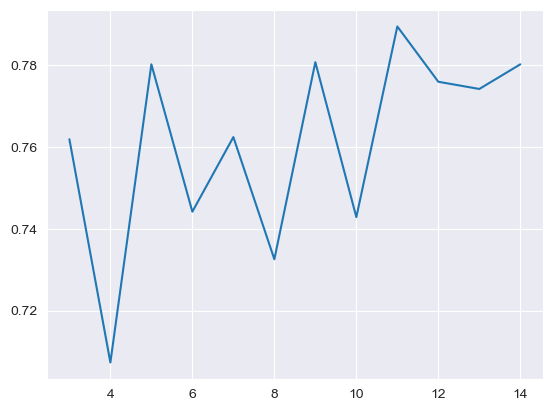

In [115]:
plt.plot([i for i in range(3,15)],f1_scores)
plt.show()

## Final Assessment of the Model Performance
Upon determining the most suitable `n_neighbors` value, evaluate the model's performance on a test set for final assessment.

In [116]:
# Write your code here. Add as many boxes as you need.

In [117]:
max_i #THis is the best parameter value for n_neighbours

11

In [118]:
bestKNN=KNeighborsClassifier(n_neighbors=max_i)
bestKNN.fit(x_train_final,y_train_final)

y_final_pred=bestKNN.predict(x_valid)

f1_score(y_valid,y_final_pred)


0.7920792079207921